In [ ]:
pip install "snowflake-connector-python[pandas]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.5 MB/s eta 0:00:00


In [ ]:
import snowflake.connector
import pandas as pd
from snowflake.connector.pandas_tools import write_pandas

# Connect to Snowflake
conn = snowflake.connector.connect(
    user="ANSHULBUXY",
    password="7869291927@Ans",
    account="TRGAYRN-NY30645",
    warehouse="COMPUTE_WH",
    database = "ONLINE_RETAIL_DEMO",
    schema = "DEMO_SCHEMA"
)

cursor = conn.cursor()



In [ ]:
query = "SELECT * FROM retail_transactions LIMIT 5"
cursor.execute(query)
df = cursor.fetch_pandas_all()
df.head()

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,COUNTRY
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
query = "SELECT COUNT(*) FROM retail_transactions"
cursor.execute(query)
print(cursor.fetchone())


(406829,)


In [ ]:
#NULL Count
query = """
SELECT
  COUNT(*) AS total,
  COUNT(CustomerID) AS non_null_customer_id,
  COUNT(*) - COUNT(CustomerID) AS null_customer_id
FROM retail_transactions
"""
cursor.execute(query)
print(cursor.fetchall())


[(406829, 406829, 0)]


<Axes: xlabel='COUNTRY'>

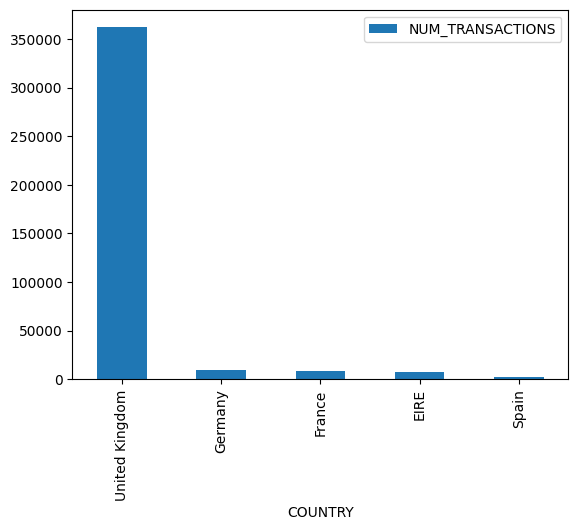

In [ ]:
#Top Countries by Transactions

query = """
SELECT Country, COUNT(*) AS num_transactions
FROM retail_transactions
GROUP BY Country
ORDER BY num_transactions DESC
LIMIT 5
"""
cursor.execute(query)
df_top_countries = cursor.fetch_pandas_all()
df_top_countries.plot(kind='bar', x='COUNTRY', y='NUM_TRANSACTIONS')



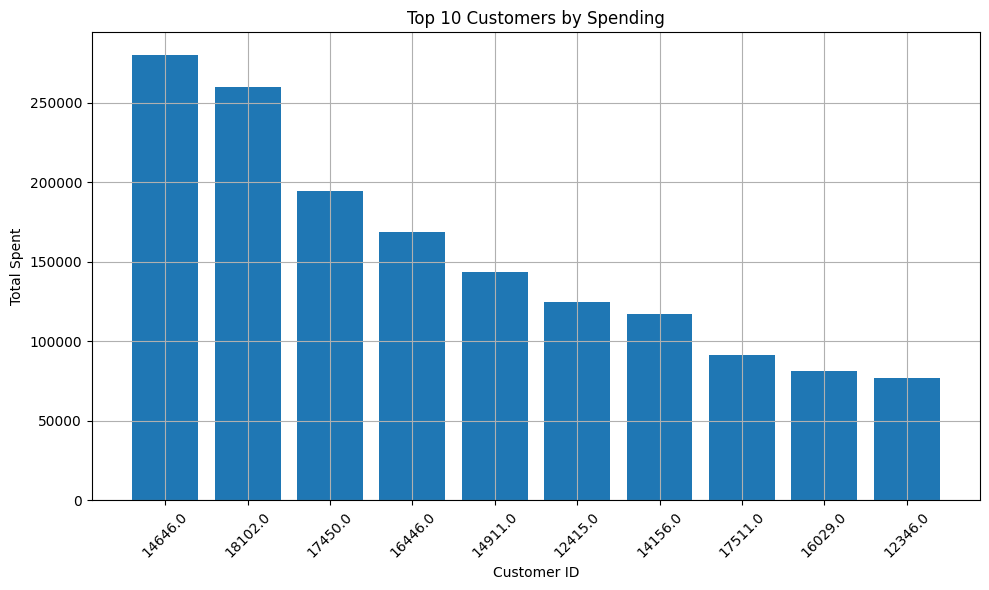

In [ ]:
#Top Customers by Total Purchase Value
import matplotlib.pyplot as plt
query = """
SELECT CustomerID, SUM(Quantity * UnitPrice) AS TotalSpent
FROM retail_transactions
WHERE Quantity > 0
GROUP BY CustomerID
ORDER BY TotalSpent DESC
LIMIT 10
"""
cursor.execute(query)
df_top_customers = cursor.fetch_pandas_all()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_customers['CUSTOMERID'].astype(str), df_top_customers['TOTALSPENT'])
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.title("Top 10 Customers by Spending")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


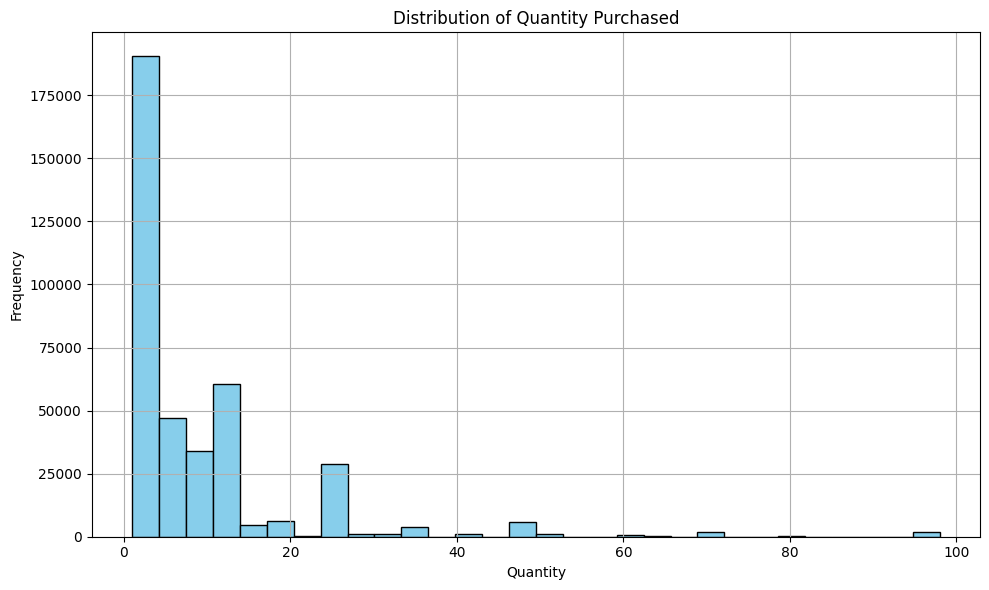

In [ ]:
#Quantity Distribution
query = """
SELECT Quantity
FROM retail_transactions
WHERE Quantity > 0 AND Quantity < 100  -- filter out outliers
"""
cursor.execute(query)
df_quantity = cursor.fetch_pandas_all()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(df_quantity['QUANTITY'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity Purchased")
plt.grid(True)
plt.tight_layout()
plt.show()


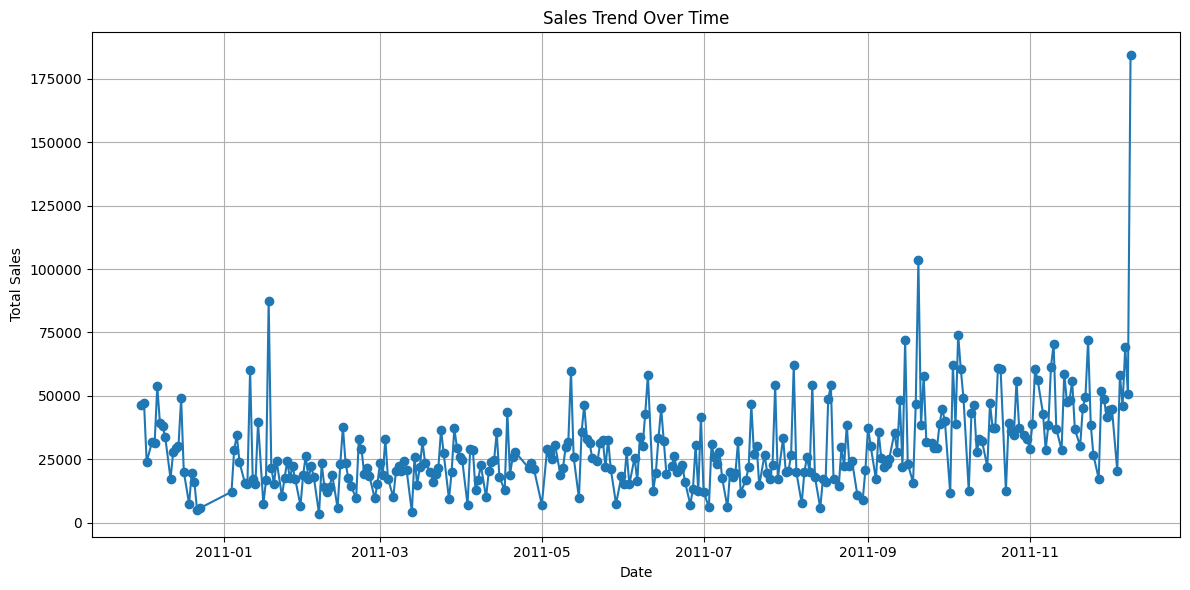

In [ ]:
#Sales trend over time

query = """
SELECT DATE(InvoiceDate) AS Date, SUM(Quantity * UnitPrice) AS TotalSales
FROM retail_transactions
WHERE Quantity > 0
GROUP BY Date
ORDER BY Date
"""
cursor.execute(query)
df_sales_time = cursor.fetch_pandas_all()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_sales_time['DATE'], df_sales_time['TOTALSALES'], marker='o')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()
